# Introduction to Dimensionality Reduction

**SPEEDS UP TRAINING (w/ some performance loss due to information loss)**
- ***curse of dimensionality***: many ML problems involve thousands/millions of features per training instance, which make training and deriving a solution very difficult
- **reducing dimensionality** (getting rid of/combining features) is a solution, however this does cause information loss (**mostly just speeds up training**)
---
**GOOD FOR DATA VISUALIZATION**
- reducing dimensionality (to 2D or 3D) is good for data visualization (*DataViz*)
- DataViz is essential to identifying patterns (like clusters) and for communicating conclusions to non-data scientists
---
**WHAT THIS CHAPTER HAS IN STORE**
- will discuss curse of dimensionality and what exactly is high-dimensional space
- cover two main approaches to dimensionality reduction (project and Manifold Learning)
- cover dimensionality reduction techniques: PCA, Kernel PCA, and LLE

# The Curse of Dimensionality

**ISSUES WITH HIGH-DIMENSIONAL DATASETS**
- fun fact: anyone you know is probably an extremist in at least one dimension (how much sugar they put in their coffee) 
- **there is so much space in high dimensions**, hence why high dimensional datasets are at risk of being very sparse: most training instances are likely going to be far away from eachother
- ^ also means that new instances will likely be far away from eachother, which makes predictions much less reliable than with lower dimensions
- **in short: the more dimensions a training set has, the greater the risk of overfitting it**

# Main Approaches for Dimensionality Reduction: Projection & Manifold Learning

## Projection

**WHY PROJECTION IS NECESSARY**
- in real world problems, instances are not spread out uniformly across all dimensions
- many features are constant, while others can be highly correlated
- **as a result, all training instances lie within (or very close to) a much lower-dimensional *subspace* of the high-dimensional space**

Saving 1.png to 1.png


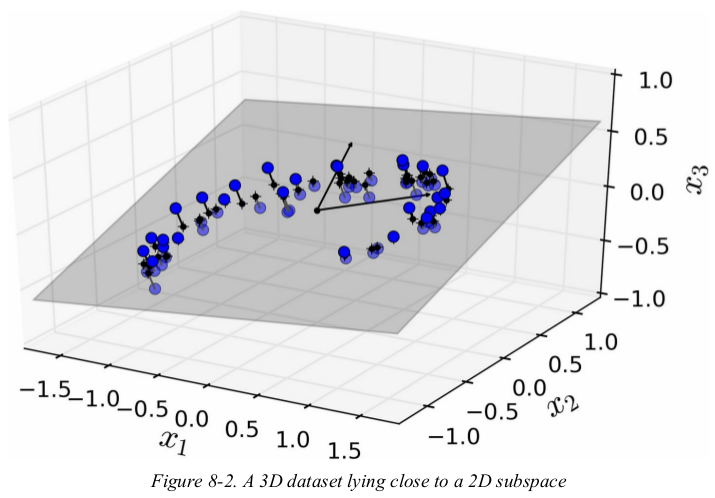

In [0]:
from google.colab import files
from PIL import Image
from io import BytesIO
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['1.png']))
im

**GRAPH DESCRIPTION**
- the training instances lie close to a plane: this is a lower-dimensional (2D) subspace in the high-dimensional (3D) space

**PROJECTION METHOD**
- **if every training instance is projected perpendicularly onto the subspace**, a new, lower-dimensional, 2D dataset is generated, hence reducing the dimensionality from 3D to 2D

Saving 2.png to 2.png


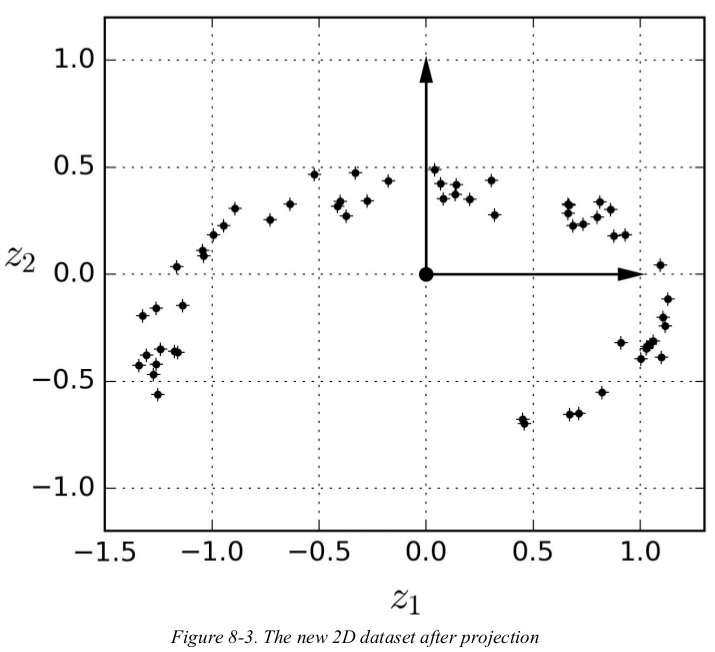

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['2.png']))
im

- the dataset's dimensionality reduced from 3D to 2D

**ISSUES WITH PROJECTION**
- projection is not always the best approach to dimensionality reduction as shown by the example below:

Saving 3.png to 3.png


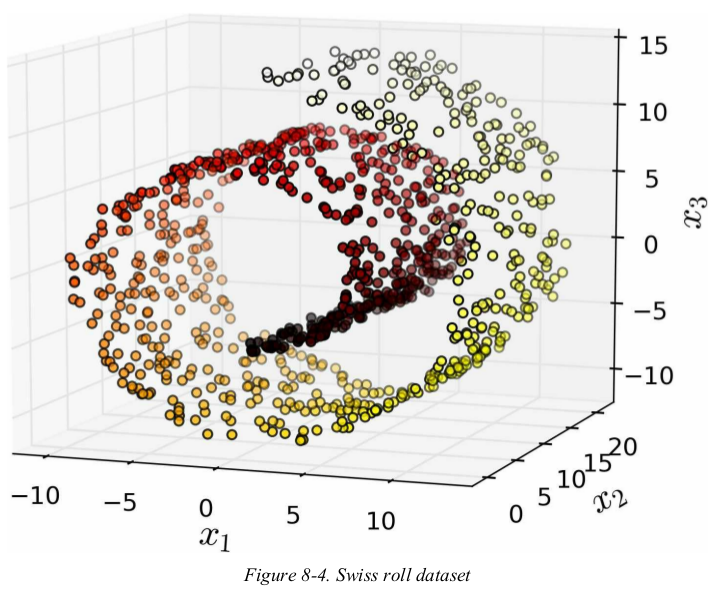

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['3.png']))
im

- in many cases, the subspace may twist and turn, such as in the famous *Swiss roll* toy dataset above

Saving 4.png to 4.png


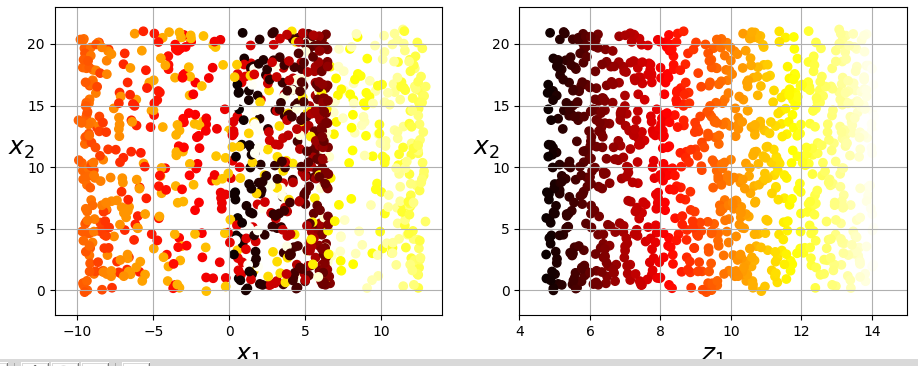

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['4.png']))
im

- LEFT: simply projecting onto a plane (dropping $x_3$) would squash different layers of the Swiss role together 
- RIGHT: the proper method for handling data like the Swiss role, to **unroll** it to obtain the 2D dataset

## Manifold Learning

**INTRODUCTION TO MANIFOLD LEARNING**
- Swiss role example = a 2D *manifold*
- a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space

**DEFINITION**
- ***Manifold Learning***: modeling the manifold on which the training instances lie, which relies on the _manifold assumption_ (_manifold hypothesis_), which states that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold
- the manifold assumption is often accompanied by another assumption: the task (classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold

Saving 5.png to 5.png


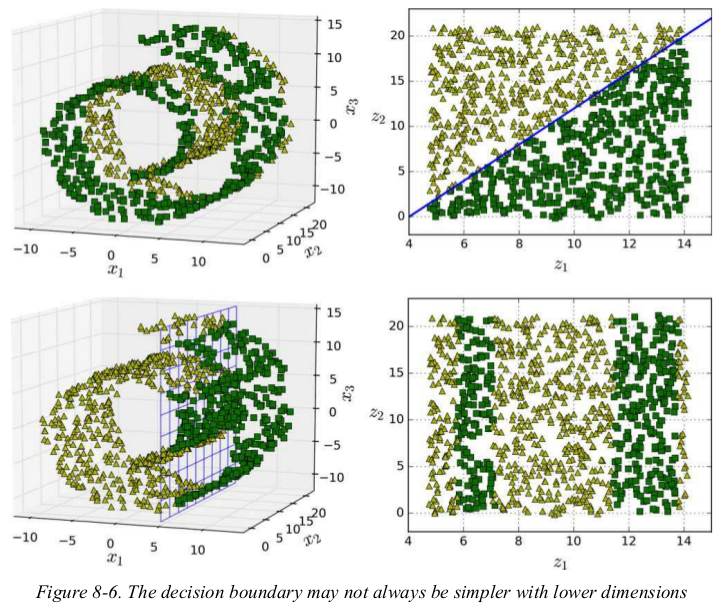

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['5.png']))
im

**TOP ROW**
- LEFT: 3D space (complex decision boundary)
- RIGHT: 2D unrolled manifold space (simple, straight line decision boundary)
---
**CONCLUSION**
- in short, reducing dimensionality of training set will speed up training, but won't always lead to a better/simpler solution (really depends on the dataset)


# Dimensionality Reduction Algorithms

## Principal Component Analysis (PCA) --> (projection)

**INTRODUCTION**
- *Principal Component Analysis* (PCA) is by far the most popular dimensionality reduction algorithm

**DEFINITION OF PCA**
- PCA uses the projection approach: first it identifies the hyperplane that lies closest to the data, and then it projects the data onto it (like in the first image)

Saving 6.png to 6.png


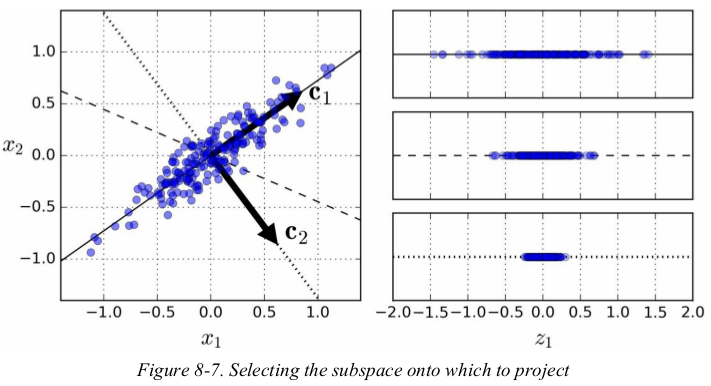

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['6.png']))
im

**PRESERVING THE VARIANCE**
- it is important to choose the correct hyperplane

**GRAPH SUMMARY**
- LEFT: simple 2D dataset w/ 3 different axes (1D hyperplanes)
- RIGHT: result of the projection of the dataset onto each axis
- SOLID LINE: projection preserves maximum variance
- DASHED LINE: projection preserves medium amount of variance
- DOTTED LINE: projection preserves little variance

**IMPORTANT TAKEAWAY**
- **select the axis that preserves the maximum amount of variance as it will lose less information than other projections** (this axis minimizes the mean squared distance between the original dataset and its projection onto the axis)

**PRINCIPAL COMPONENTS**
- as just discussed, PCA identifies the axis that accounts for the largest amount of variance in the training set
- the $ith$ axis is called the $ith$ *principal component* (PC) of the data

**ABOVE GRAPH AS AN EXAMPLE**
- the first PC is the axis on which vector $c_1$ lies
- the second PC is the axis on which vector $c_2$ lies (orthogonal to the first)

**FINDING THE PRINCIPAL COMPONENTS OF A TRAINING SET**
- FIND PCs using standard matrix factorization technique: *Singular Value Decomposition* (SVD)
- SVD decomposes the training set matrix **X** into the matrix multiplication of 3 matrices --> **V** contains the unit vectors that define all the principal components 

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

- build a 3D dataset

In [0]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [0]:
X[:, 0] # all 3 look similar

array([-1.01570027, -0.00771675, -0.95317135, -0.92012304, -0.76309739,
        1.11816122, -1.02258878,  0.67351984,  1.01619558,  0.54957723,
       -0.98960443,  1.13248106, -0.99337712, -0.94763679,  1.10095709,
       -0.34604591,  0.69102621,  0.68302902,  0.8774031 , -1.06090127,
        0.52336644, -0.94419403, -0.9716288 , -1.10560661,  1.1748694 ,
        0.91337123, -0.28688829,  1.10247263, -0.93581594,  0.6617217 ,
        0.09896169, -1.08103158,  0.03004261,  0.97846627,  0.97257451,
       -0.06924261,  0.01690169, -0.40544483,  0.64162827, -0.64012055,
        0.7326402 , -0.44999735, -0.98461065,  1.11939222,  0.78441066,
        0.16636498, -0.67371747,  1.11429663, -0.11381596, -0.45471725,
       -1.15790478,  0.83494104, -0.46940298,  1.14845951,  0.24039921,
        1.10567699, -1.01152009,  0.52519411, -1.09575714,  0.58692443])

- using NumPy's svd() function to obtain all the principal components of the training set, then it extracts the 2 unit vectors that define the first two PCs

In [0]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

- PCA assumes the data is centered around an origin
- Scikit-Learn's PCA classes take care of centering the data
- remember to center the data for manual implementation (as just done above)

In [0]:
c1, c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

---
**PROJECTING DOWN TO d DIMENSIONS**

---
- after identifying the principal components, reduce the dimensionality of the dataset down to $d$ dimensions by **projecting** it onto the hyperplane defined by the first principal $d$ principal components
- selecting this hyperplane ensures that the projection will preserve as much variance as possible

In [0]:
# PROJECTING THE TRAINING SET ONTO THE PLANE DEFINED BY THE FIRST 2 PRINCIPAL COMPONENTS

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

- we just learned how to reduce the dimensionality of any dataset down to any number of dimensions, while preserving as much variance as possible

**USING SCIKIT-LEARN**
- PCA class uses SVD decomposition to implement PCA --> just like we did

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2 dimensions
X2D = pca.fit_transform(X)

- the above code applies PCA to reduce the dimensionality of the dataset down to 2 dimensions (automatically centers the data)

In [0]:
X3D_inv = pca.inverse_transform(X2D)
np.allclose(X3D_inv, X)

False

- of course, there was some **information loss** projection step, as illustrated above (the recovered 3D points are note equal to the original 3D points)

In [0]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

- above = construction error

- the `PCA` object gives access to the principal components that it computed:

In [0]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

**EXPLAINED VARIANCE RATIO**
- another useful piece of info: *explained variance ratio* of each PC
- explained_variance_ratio_  variable
- the ratio indicates the proportion of the dataset's variance that lies along each PC

In [0]:
pca.explained_variance_ratio_ 
# the 1st dimension explains 84% of the variance, while the 2nd exmaplins 14% of the variance
# this leaves 1.2% for the 3rd PC, so the little PC must carry little information (hopefully)

array([0.84248607, 0.14631839])

In [0]:
1 - pca.explained_variance_ratio_.sum()
# by projecting down from 3D to 2D, we lost about 1% of the variance

0.011195535570688975

---
**CHOOSING THE RIGHT NUMBER OF DIMENSIONS** (IMPORTANT)

---

- instead of arbitrarily $d$ dimension to reduce down to, **choose the number of dimensions that add up to a sufficiently large portion of the variance (i.e., 95%)**
- unless, of course, the objective is to create DataViz, in which case reduce the dimensionality down to 2D or 3D

In [0]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [0]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

- the following code performs PCA without reducing dimensionality, **then computes the minimum number of dimensions required to preserve 95% of the training set's variance**

In [0]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [0]:
d

154

In [0]:
np.sum(pca.explained_variance_ratio_) # 95% variance! (just as we specified)

1.0000000000000002

In [0]:
'''OR USE THIS CODE'''
pca = PCA(n_components=0.95) # float between 0-1 indicates ratio of variance you wish to be preserved
X_reduced = pca.fit_transform(X_train)

In [0]:
np.sum(pca.explained_variance_ratio_)

0.9504326468621527

Saving figure explained_variance_plot


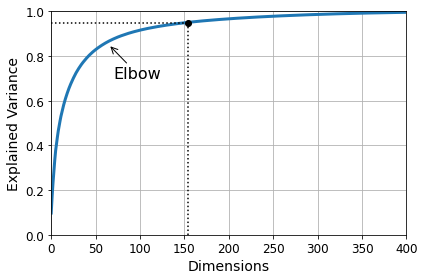

In [0]:
'''OR PLOT A GRAPH'''
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

- as you can see, reducing the dimensionality down to, say, 100 dimensions, wouldn't lose too much explained variance
- elbow is where the explained variance starts growing real fast

**PCA FOR COMPRESSION**
- after applying PCA to the MNIST dataset while preserving 95% of its variance, each instance has over 150 features, instead of the original 784 features, so while most of the variance is preserved, the dataset is now less than 20% of it's original size (this is a reasonable compression ratio)
---
- the following code compresses MNIST dataset down to 154 dimensions, then uses the inverse_transform() method to decompress it back to 784 dimensions

In [0]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [0]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


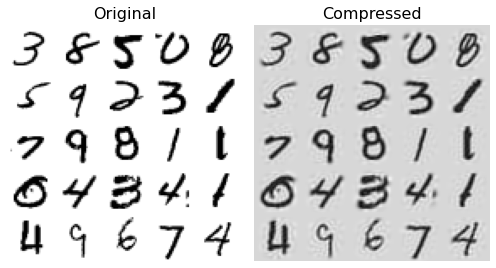

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

---
**RANDOMIZED PCA**

---
- *svd_solver="randomized"* --> Scikit-Learn's stochastic *Randomized PCA* algorithm that quickly finds an approximation of the first $d$ PCs (drastically faster)

In [0]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit(X_train) # much faster

- Scikit-Learn uses randomized PCA algorithm if $m$ or $n$ is greater than 500 and $d$ is less than 80% of $m$ or $n$, otherwise it defaults to the full SVD approach

---
**INCREMENTAL PCA**

---
- one problem with PRECEDING implementations is that they require the entire training set to fit in memory in order for the algorithm to run
- *Incremental PCA* (IPCA) algorithms allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time, which is useful for large training sets and for applying PCA online (i.e., on the fly, as new instances arrive)
--- 
- **the following code splits MNIST dataset into 100 mini-batches using NumPy's array_split() function and then reduces its dimensionality (like before)**
- must call **partial_fit()** for each mini-batch rather than the fit() method for the whole training set

In [0]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book (VERY COOL)
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [0]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

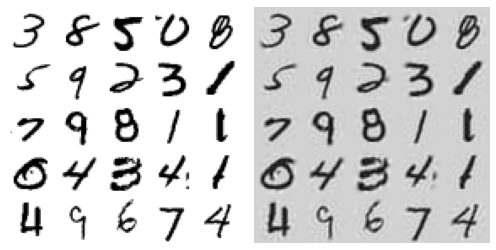

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [0]:
np.allclose(pca.mean_, inc_pca.mean_) # the means are equal 

True

In [0]:
# REGULAR PCA vs. INCREMENTAL PCA
X_reduced_inc_pca = X_reduced
np.allclose(X_reduced_pca, X_reduced_inc_pca)
# Incremental PCA is good, but not as accurate as regular PCA

False

In [0]:
'''ALTERNATIVE METHOD (NumPy's memmap class)'''
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [0]:
del X_mm # ensures data is saved to disk

In [0]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

## Kernel PCA (kPCA) --> (projection) (nonlinear technique)


- a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the *original space*
- well, similar to the kernel trick in chapter 5 (enabling nonlinear classification and regression with Support Vector Machines), it turns out that the same trick can be applied to PCA, **making it possible to perform complex nonlinear projections for dimensionality reduction** (*Kernel PCA* (kPCA))
- Kernel Principal Component Analysis is often **good at preserving clusters of instances after projection and even unrolling datasets that lie close to a twisted manifold**

Saving 7.png to 7.png


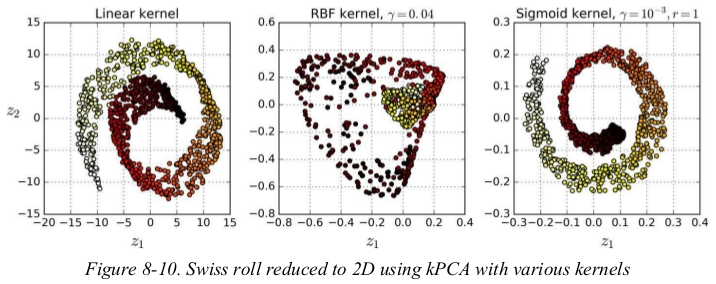

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['7.png']))
im

In [0]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [0]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [0]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

In [0]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

- code for the above graph

---
**SELECTING A KERNEL & TUNING HYPERPARAMETERS**

---
- kPCA is an unsupervised learning algorithm and there is no obvious performance measure to help determine the best kernel and hyperparameter values
- **dimensionality reduction is often a preparation step for a supervised learning task (i.e., classification), so just use grid search to select the kernel and hyperparameters that lead to the best performance on that task**
---
**AMAZING/IMPORTANT PIPELINE EXAMPLE**
- the following code creates a 2-step pipeline --> first reducing the dimensionality to 2 dimensions using kPCA (did not find the optimal dimensions, book just gives us 2), then applying Logistic Regression for classification, then using GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracyat the end of the pipeline

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [0]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)), # reduces dimensions
        ("log_reg", LogisticRegression(solver="lbfgs")) # logistic regression for classification
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10), # gamma values
        "kpca__kernel": ["rbf", "sigmoid"] # different kernels
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3) # finding optimal kernel + hyperparameter values
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [0]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


---
---
---
---

In [0]:
'''LOWEST CONSTRUCTION ERROR''' # different from above
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True) # the trick is setting this to True (default is False)

In [0]:
'''CALCULATING RECONSTRUCTION PRE-IMAGE ERROR'''
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576617

- now you can use grid search with cross-validation to find the kernel and hyperparameters that minimize this error

## Locally Linear Embedding (LLE) --> (manifold learning)

- *Locally Linear Embedding* (LLE) is another powerful *nonlinear dimensionality reduction* (NLDR) technique
- Manifold Learning technique that does not rely on projections, like PCA and kPCA algorithms do

**HOW LLE WORKS**
- LLE first measures how each training instance linearly relates to its closest neighbor (c.n.), and then looks for a low-dimensional representation of the training set where thesee local relationships are best preserved


In [0]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

Saving figure lle_unrolling_plot


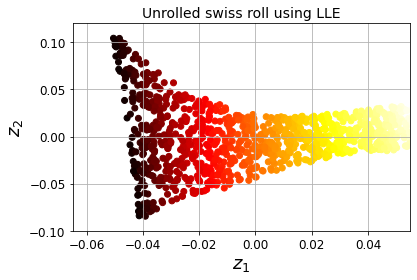

In [0]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

- the above code using Scikit-Learn's LocallyLinearEmbedding class to unroll the Swiss role
---
**IN-DEPTH UNDERSTANDING OF HOW LLE WORKS**
- for each training instance $x^i$, LLE identifies its $k$ closest neighbors, then tries to reconstruct $x^i$ as a linear function of these neighbors 
- THEN, it maps the training instances into a $d$-dimensional space (where $d$ < $n$) while preserving the local relationships as much as possible
---
**DRAWBACK OF LLE**
- LLE scales very poorly to large datasets

# Other Dimensionality Reduction Techniques

---
**RANDOM PROJECTIONS**

---
- projects the data to a lower-dimensional space using a random linear projection
- such a random project is actually likely to preserve distances quite well
- **the quality of the dimensionality reduction depends on the number of instances and the target dimensionality**, not on the initial dimensionality
- sklearn.random_projection package 

---
**MULTIDIMENSIONAL SCALING (MDS)**

---
- reduces dimensionality while trying to preserve the distances between the instances

In [0]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

---
**ISOMAP**

---
- creates a graph by connecting each instance to its c.n. (closest neighbors) then reduces dimensionality while trying to preserve the *geodesic distances* (number of nodes on the shortest path between these nodes) between the instances

In [0]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

---
**t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING (t-SNE)**

---
- reduces dimensionality | keeps similar instances close | pushes dissimilar instances apart
- **mostly used for visualization**, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D)

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

---
**LINEAR DISCRIMINANT ANALYSIS (LDA)**

---
- classification algorithm
- during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data (**projection technique**)
- keeps classes as far apart as possible
- **LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

---
**BEAUTIFUL GRAPHS**

---

Saving figure other_dim_reduction_plot


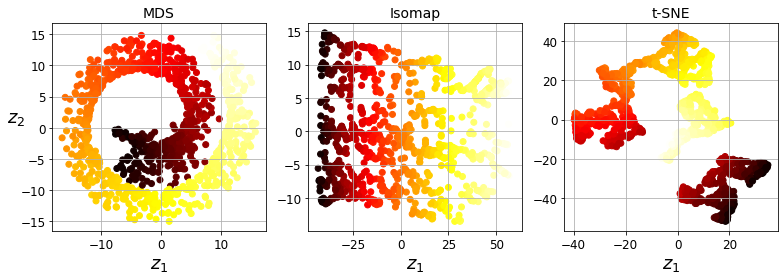

In [0]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()

# Exercises

---
**1) The Primary Reasons for Dimensionality Reduction:**

--- 
- to speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, yielding better performance) 
- to visualize the data (2D or 3D) and gain insights on important features (big part of getting your points across to non-data scientists
- to save memory/space (compression) 
---
**1) The Main Drawbacks Are:**

--- 
- some information is always lost, which can potentially degrade the performance of your subsequent training algorithms
- can take a lot of computing power (however this seems rather silly to list here as overall it is saving a lot of computing power too, right?)
- adds complexity to ML pipelines
- transformed features can be hard to interpret 

---
**2) The Curse of Dimensionality:**

---
- there are many problems that exist in high-dimensional space that are not apparent in low-dimensional space
- in ML, randomly sampled high-dimensional vectors are generally very sparse (everything is spread thin), which amplifies the risk of overfitting and makes it hard to identify patterns

---
**3) Data is Always Lost Through Dimensionality Reduction:**

---
- once a dataset's dimensionality has been reduced, it is almost impossible to perfectly reverse it as some information is always lost
- algorithms like Principal Component Analysis (PCA) have simple reverse transformation procedures, many do not

---
**4) PCA's Abilites/Limits:**

---
- standard PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear (kPCA helps with such) because it can always discard useless dimensions
- however, if there are no useless dimensions, as in the case of the Swiss role dataset, then dimensionality reduction with PCA will lose a lot of data

---
**5) PCA's Abilities/Limits Continued:**

---
- if a dataset is composed of points that are almost perfectly aligned throughout 1,000 dimensions, then PCA can reduce its dimensionality down to 1 dimension and still preserve 95%+ of its variance
- if the points are perfectly random/scattered throughout the 1,000 dimensions, however, then roughly 950 dimensions would have to be preserved in order to keep variance at 95% after reduction

---
**6) Different PCA Techniques:**

---
- default = regular PCA (if dataset can fit in memory)
- incremental PCA is useful for online tasks (applying PCA on the fly when new instances arrive)/if a dataset cannot fit in memory, however, it takes an extremely long time
- randomized PCA is useful if you want to significantly reduce dimensionality + the fastest
- kernel PCA is useful for nonlinear datasets

---
**7) Measuring the Effectiveness of Dimensionality Reduction:**

---
- a dimensionality reduction algorithm did a good job if it successfully reduced the dimensions of a dataset down to a desired dimension, and at the same time, preserved a high percentage of its variance
- if the dimensionality reduction algorithm has a reverse transformation feature, then you can find the reconstruction error
- an alternative and more likely solution is to measure the performance of an algorithm (i.e., a random forest classifier) on the reduced dataset and see how it performs - if it performs well, then much of the variance from the original dataset was obviously preserved (dimensionality reduction as a pre-processing step, that is) 

---
**8) Chaining Dimensionality Reduction Algorithms:**

---
- it is sometimes appropriate to chain together dimensionality reduction algorithms
- it is common to use PCA to get rid of useless dimensions, and then to perform LLE to really get in there and do the dirty, slow work
- this two-step approach will yield the same results as using LLE alone, but in a fraction of the time as LLE is very slow (a sensitive to scaling)

---
### 9) Dimensionality Reduction w/ Random Forest Classifier:

---

*Exercise: Load the MNIST dataset (introduced in chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).*

In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target[0] # classifiers take numeric values

'5'

In [0]:
mnist.target = mnist.target.astype(np.uint8)

In [0]:
# Train Set
X_train = mnist['data'][:60000] # first 60,000 instances
y_train = mnist['target'][:60000]

# Test Set
X_test = mnist['data'][60000:] # last 10,000 instances
y_test = mnist['target'][60000:]

*Exercise: Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.*

In [0]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [0]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [34]:
print("Training took {:.2f}s".format(t1 - t0)) # kinda long

Training took 49.72s


In [35]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

*Exercise: Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.*

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

*Exercise: Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?*

In [37]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 114.17s


- training is twice as slow
- dimensionality reduction does not always reduce the training speed as it really depends on the dataset, the training algorithm, and the model

*Exercise: Next evaluate the classifier on the test set: how does it compare to the previous classifier?*

In [0]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

- PCA reduced training speed and performance
- we will try using softmax regression

In [45]:
# EXPERIMENTING AGAIN ON ANOTHER MODEL
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42) # softmax (multinomial) regression handles multiple classes
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 33.47s


In [47]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

- let's see if PCA can help improve this model

In [52]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
print("Training took {:.2f}s".format(t1 - t0)) 

Training took 11.01s


- great, triming time took significantly less

In [0]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

- through first-hand experimentation, we saw how PCA can drastically reduce training time + still yield a decent result

---
### 10) t-SNE (mostly used for visualization) w/ MNIST:

---

*Exercise: Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class.*
- (t-Stochastic Neighbor Embedding)
- MNIST dataset was loaded above
- dimensionality reduction to this degree would take a very long time on 60,000 images, so let's only use 10,000 instead

In [0]:
np.random.seed(42)

In [0]:
idx = np.random.permutation(60000)[:10000]

In [0]:
X = mnist['data'][idx]
y = mnist['target'][idx]

- use t-SNE to reduce the dimensionality of the dataset down to 2D for visualization

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42) #n_components=2 (reduce to 2D)
X_reduced = tsne.fit_transform(X)

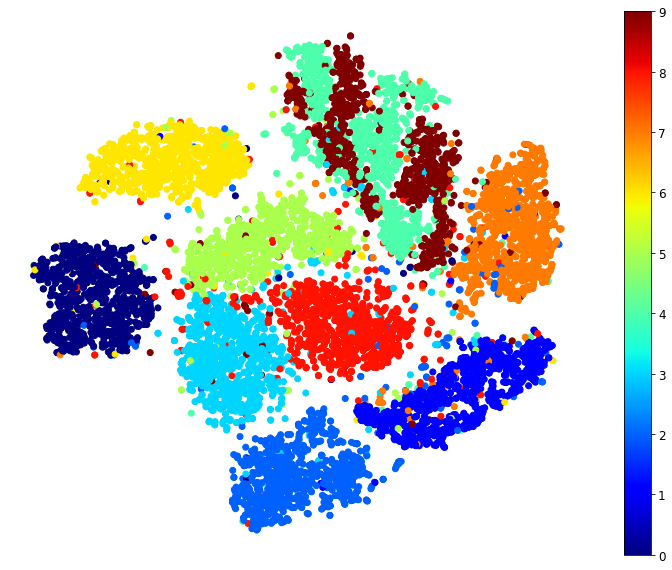

In [67]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

- this plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on)
---
- let's focus on digits 3 and 5 as they overlap a lot

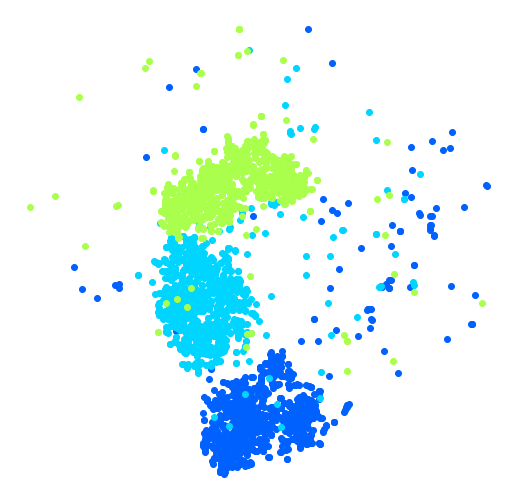

In [73]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet") # jet is a popular color map
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

- let's see if we can producer a clearer, more precise, nicer image by running t-SNE on the 3 digits

In [0]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

In [0]:
tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

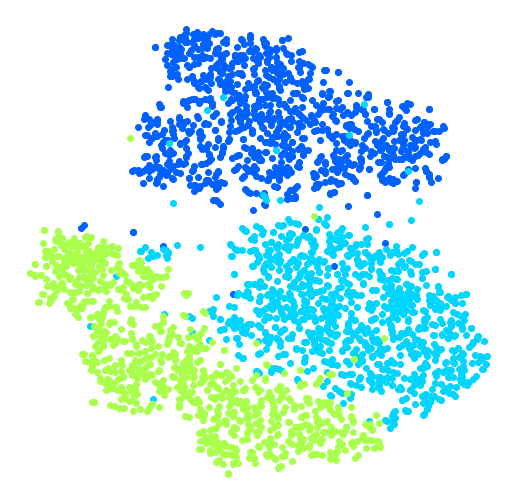

In [76]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()